In [13]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import tensorflow
import pandas as pd

In [15]:
from tensorflow.keras import datasets,layers,models
(x_train,y_train),(x_test,y_test)= datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [16]:
y_train.shape

(50000, 1)

In [17]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [18]:
y_train=y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

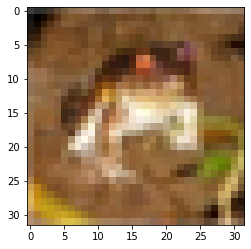

In [19]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [22]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
def ploot(x,y,index):
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

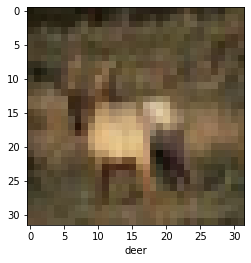

In [25]:
ploot(x_train,y_train,3)

In [27]:
cnn= models.Sequential([
    layers.Conv2D(filters=64,kernel_size=(4,4),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(4,4),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [29]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 149s 94ms/step - loss: 1.9901 - accuracy: 0.3021
Epoch 2/10
1563/1563 [==============================] - 145s 93ms/step - loss: 1.4853 - accuracy: 0.4672
Epoch 3/10
1563/1563 [==============================] - 143s 92ms/step - loss: 1.3602 - accuracy: 0.5152
Epoch 4/10
1563/1563 [==============================] - 144s 92ms/step - loss: 1.2518 - accuracy: 0.5565
Epoch 5/10
1563/1563 [==============================] - 144s 92ms/step - loss: 1.1694 - accuracy: 0.5895
Epoch 6/10
1563/1563 [==============================] - 143s 92ms/step - loss: 1.0979 - accuracy: 0.6120
Epoch 7/10
1563/1563 [==============================] - 143s 92ms/step - loss: 1.0496 - accuracy: 0.6319
Epoch 8/10
1563/1563 [==============================] - 145s 93ms/step - loss: 0.9929 - accuracy: 0.6537
Epoch 9/10
1563/1563 [==============================] - 143s 92ms/step - loss: 0.9523 - accuracy: 0.6685
Epoch 10/10
1563/1563 [==============================] 

cnn.evaluate(x_test,y_test)

In [33]:
y_pred=cnn.predict(x_test)
y_pred

313/313 [==============================] - 7s 20ms/step


array([[5.29483252e-04, 1.36574218e-03, 2.14955844e-02, ...,
        3.85739398e-03, 3.29944817e-03, 4.48477175e-03],
       [1.57133132e-01, 1.60488620e-01, 2.02673946e-05, ...,
        9.82488473e-07, 2.23609552e-01, 4.58745241e-01],
       [1.48302779e-01, 3.22465450e-01, 7.10196374e-03, ...,
        8.54619872e-03, 3.30440074e-01, 1.45970687e-01],
       ...,
       [3.19852203e-04, 5.10555026e-07, 3.70447263e-02, ...,
        2.20215935e-02, 2.67294945e-06, 1.43194775e-05],
       [3.23812127e-01, 1.34203628e-01, 1.05188312e-02, ...,
        2.40620211e-01, 3.87585233e-03, 5.41426986e-02],
       [2.45354603e-09, 1.03577682e-12, 5.69999429e-07, ...,
        9.99740362e-01, 2.79676456e-11, 1.23672905e-09]], dtype=float32)

In [34]:
import numpy as np
classs=[np.argmax(i) for i in y_pred]
classs[:5]

[3, 9, 8, 0, 4]

In [35]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [37]:
y_test=y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

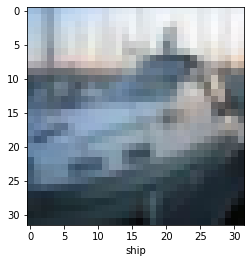

In [39]:
ploot(x_test,y_test,2)

Using mnist dataset(handwritten digits)

In [40]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [42]:
x_train.shape

(60000, 28, 28)

In [43]:
x_train=x_train.reshape(len(x_train),28,28,1)
x_train.shape

(60000, 28, 28, 1)

In [53]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [48]:
model=models.Sequential([
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(32,activation='relu'),
    layers.Dense(10,activation='softmax')
]
)

In [52]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [54]:
model.fit(x_train,y_train,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 134s 71ms/step - loss: 0.2796 - accuracy: 0.9431
Epoch 2/2
1875/1875 [==============================] - 131s 70ms/step - loss: 0.0675 - accuracy: 0.9809


Text(0.5, 0, '1')

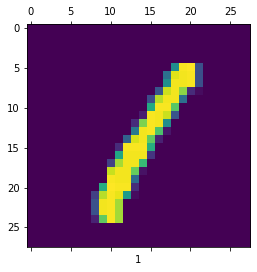

In [59]:
plt.matshow(x_train[3])
plt.xlabel(y_train[3])